# Summer/Winter Olympics Data Exploratory and Visualization

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Importing Data 
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic = pd.read_csv('dictionary.csv')

In [3]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [6]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [7]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [8]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [9]:
# Checking the NaN values in dic dataset
dic[dic.isnull().any(axis=1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


## Merging and Concatenating

In [10]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [11]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [12]:
# Concatenating Summer and Winter Data
olympics = pd.concat([summer, winter],axis=0, keys=['Summer', 'Winter'], names=['Edition']).reset_index()

In [13]:
olympics.head()

,Edition,level_1,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [14]:
# Dropping level_1 column
olympics.drop(columns='level_1', inplace=True)

In [15]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [16]:
dic.head(3)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


In [17]:
olympics = olympics.merge(dic.iloc[:,:2], how='left', left_on='Country', right_on='Code').drop(columns='Code')

In [18]:
olympics.head(5)

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


### Data Cleaning

In [19]:
# Renaming Columns

olympics.rename(columns={'Country_x': 'Code', 'Country_y':'Country'}, inplace=True)

In [20]:
# Renaming GDP column in dic dataset
dic.rename(columns={'GDP per Capita':'GDP'}, inplace=True)

In [21]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [22]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [23]:
olympics['Country'].hasnans

True

In [24]:
olympics.loc[olympics['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [25]:
# Getting index of missing values
missing_c_index = olympics.loc[olympics['Country'].isnull()].index
missing_c_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [26]:
olympics.loc[olympics['Country'].isnull()]['Code'].value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [31]:
old_c = olympics.loc[olympics['Country'].isnull(), :]['Code'].value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [36]:
# Mapping Country Code to Country Name
country_mapper = pd.Series(index=old_c, name='Country', data=['Soviet Union', 'East Germany', 'Romania', 'West Germany', 'Czechoslovakia', 'Yugoslavia','Unified Team', 'Unified Team of Germany', 'Mixed teams', 'Serbia', 'Australasia', 'Russian Empire', 'Montenegro', 'Trinidad and Tobago', 'Bohemia', 'West Indies Federation', 'Singapore', 'Independent Olympic Participants'])

In [37]:
country_mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [41]:
# Replacing Code column Values in the Olympic dataset
olympics.loc[missing_c_index, 'Code'].map(country_mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [44]:
# Filling the missing values
olympics['Country'].fillna(olympics['Code'].map(country_mapper), inplace=True)

In [45]:
olympics.loc[missing_c_index]

# for ZZX = Mixed Teams
# for EUN = Unified Team

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [50]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.4+ MB


In [51]:
# Null values in code column
olympics[olympics['Code'].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [53]:
# Dropping Null Values in Code Column
olympics.dropna(subset=['Code'], inplace=True)

In [54]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [58]:
olympics.reset_index(drop=True, inplace=True)

In [60]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [63]:
# Assigning Medal as Category datatype
olympics['Medal'] = olympics['Medal'].astype('category')

In [65]:
olympics.info()
# Saved some memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [66]:
olympics['Medal'].sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [71]:
# Setting Categories from Bronze, Silver and Gold
olympics['Medal'].cat.set_categories(["Bronze", "Silver", "Gold"], ordered=True, inplace=True)

/Users/thesumitshrestha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [72]:
olympics['Medal'].sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [74]:
olympics.tail(3)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic
36930,Winter,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze,France


## Data Visualization

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

### What are the most successful countries of all time?

In [95]:
top_10 = olympics['Country'].value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

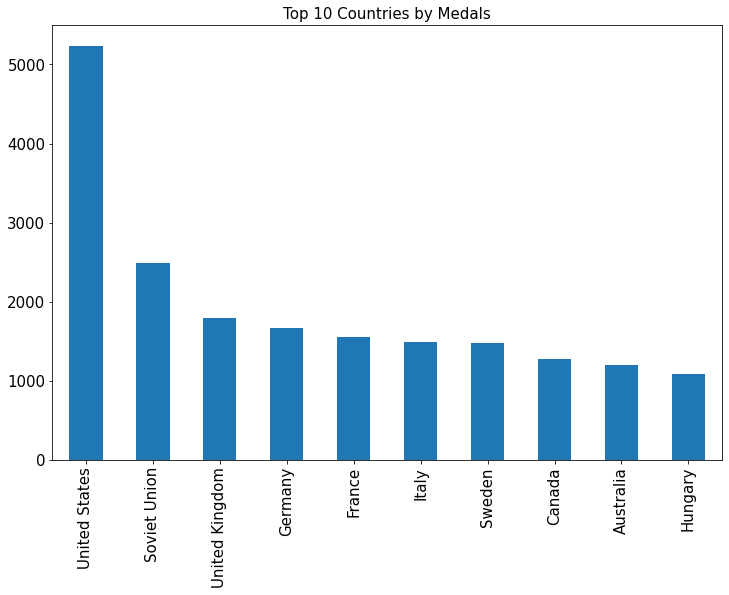

In [96]:
top_10.plot(kind='bar', fontsize=15, figsize=(12,8))
plt.title('Top 10 Countries by Medals', fontsize=15)
plt.show()

In [108]:
# Filter data with top 10 Olympics Countries only
olympics_10 = olympics[olympics['Country'].isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


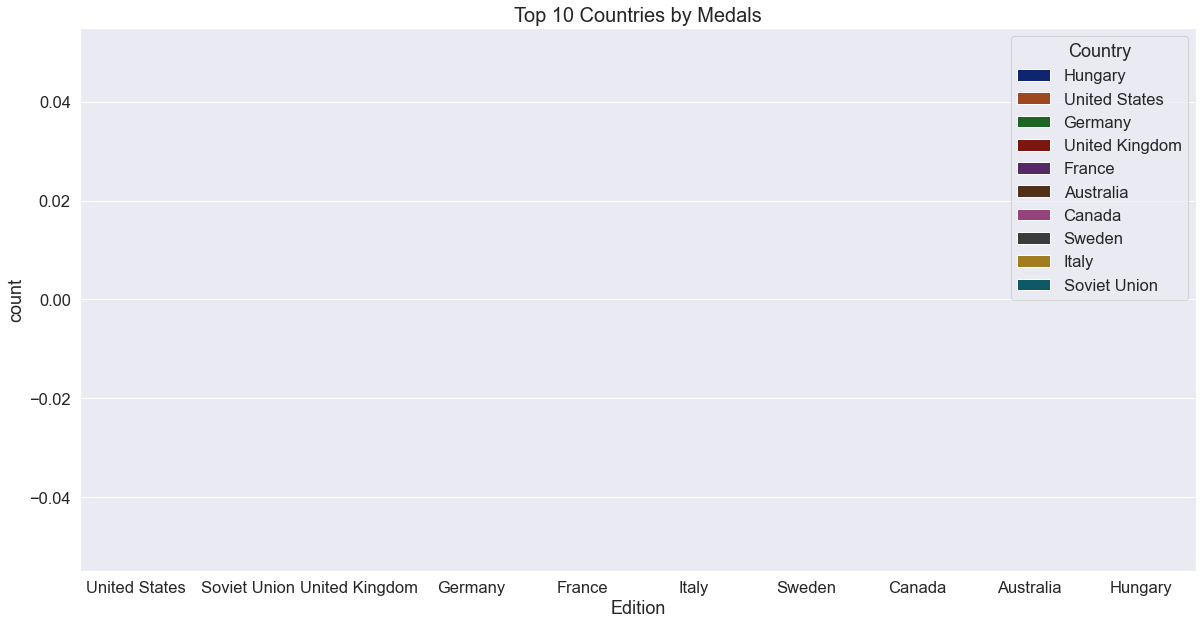

In [109]:
# Plotting value count with seaborn

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x ='Edition', hue='Country',order=top_10.index)
plt.title('Top 10 Countries by Medals', fontsize=20)
plt.show()

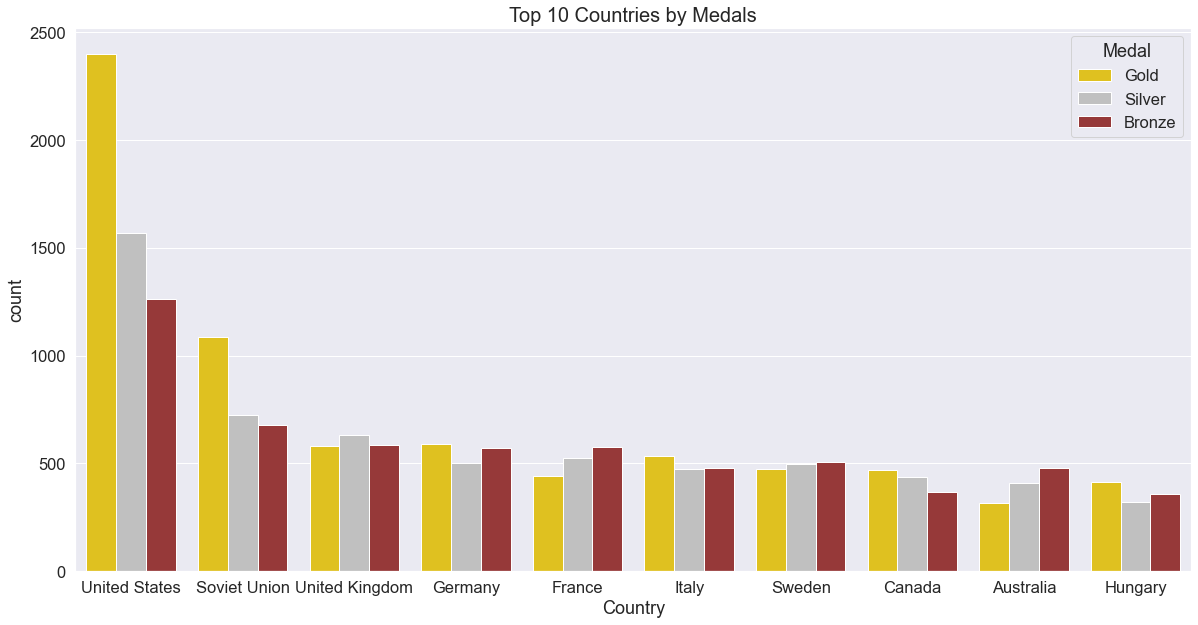

In [116]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Country', hue='Medal',order=top_10.index, hue_order=['Gold', 'Silver', 'Bronze'], palette=['gold', 'silver', 'brown'])
plt.title('Top 10 Countries by Medals', fontsize=20)
plt.show()

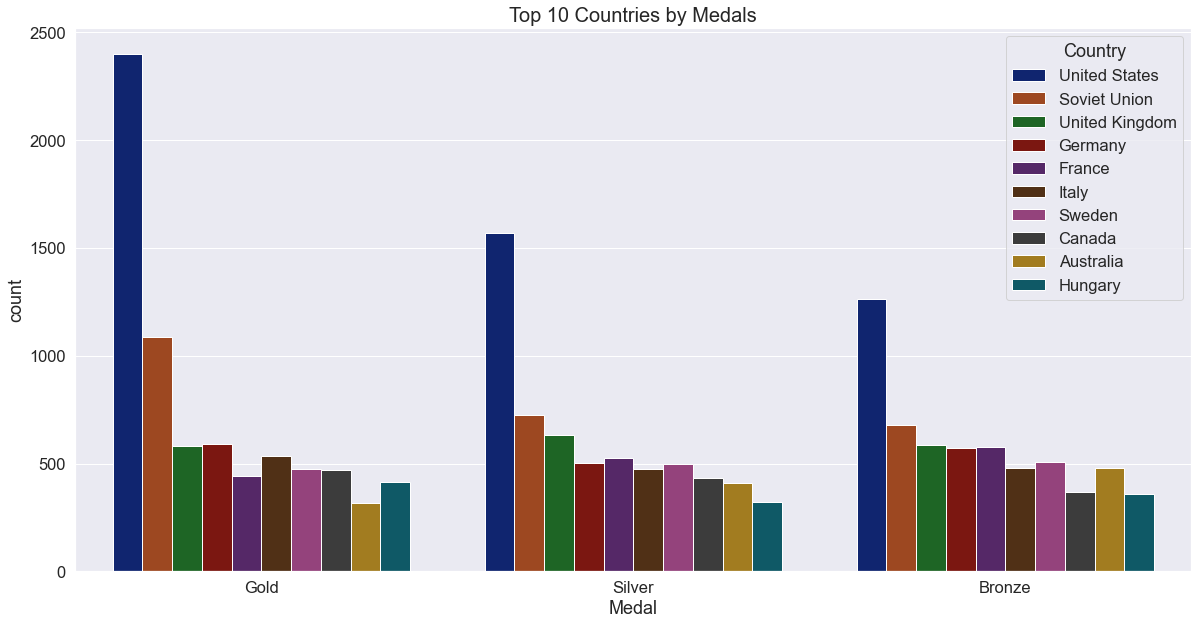

In [119]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Medal', hue='Country',hue_order=top_10.index, order=['Gold', 'Silver', 'Bronze'])
plt.title('Top 10 Countries by Medals', fontsize=20)
plt.show()

### Do GDP, Population and Politics matter?

In [121]:
olympics.head(2)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria


In [234]:
# Count the medals per country

oly_group = olympics.groupby(['Country', 'Medal'])['Medal'].count().reset_index(name='Total')
oly_group.head()

,Country,Medal,Total
0,Afghanistan,Bronze,2
1,Afghanistan,Silver,0
2,Afghanistan,Gold,0
3,Algeria,Bronze,8
4,Algeria,Silver,2


In [243]:
medals_per_country = oly_group.pivot(index='Country', columns='Medal', values='Total')
medals_per_country.head()

Medal,Bronze,Silver,Gold
Country,,,
Afghanistan,2,0,0
Algeria,8,2,5
Argentina,91,99,69
Armenia,8,2,1
Australasia,5,4,20


In [244]:
# Total Medal Count

medals_per_country['Total'] = medals_per_country.sum(axis=1)
medals_per_country.head()

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29


In [261]:
    medals_per_country = medals_per_country[['Total', 'Gold', 'Silver', 'Bronze']].sort_values(by=['Total','Gold', 'Silver', 'Bronze'], ascending=False)
    medals_per_country

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [262]:
dic.head(2)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [264]:
medals_per_country.head(2)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677


In [284]:
medals_per_country = medals_per_country.merge(dic, how='left', left_index=True, right_on='Country').drop(columns=['Code']).set_index('Country')

In [289]:
medals_per_country

,Total,Gold,Silver,Bronze,Total Games,Population,GDP
Country,,,,,,,
United States,5238,2402,1571,1265,48,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,18,NaN,NaN
United Kingdom,1799,580,632,587,42,65138232.0,43875.969614
Germany,1665,589,504,572,25,81413145.0,41313.313995
France,1548,444,526,578,47,66808385.0,36205.568102
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,1,36423395.0,4943.760388
Macedonia,1,0,0,1,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1,1262605.0,9252.110724


In [290]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
Games            49
dtype: int64

In [291]:
# Adding Games Column
olympics['Games'] = olympics.apply(lambda x: str(x.Year) + ' ' + x.City, axis = 1)

In [292]:
olympics.head(3)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens


In [293]:
olympics['Games'].nunique()

49

In [294]:
olympics['Games'].value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [295]:
# Games by Country
olympics.groupby('Country').apply(lambda x: x['Games'].nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [296]:
medals_per_country['Total Games'] = olympics.groupby('Country').apply(lambda x: x['Games'].nunique())

In [297]:
medals_per_country

,Total,Gold,Silver,Bronze,Total Games,Population,GDP
Country,,,,,,,
United States,5238,2402,1571,1265,48,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,18,NaN,NaN
United Kingdom,1799,580,632,587,42,65138232.0,43875.969614
Germany,1665,589,504,572,25,81413145.0,41313.313995
France,1548,444,526,578,47,66808385.0,36205.568102
...,...,...,...,...,...,...,...
Iraq,1,0,0,1,1,36423395.0,4943.760388
Macedonia,1,0,0,1,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1,1262605.0,9252.110724


In [298]:
medals_per_country.rank(ascending=False)

,Total,Gold,Silver,Bronze,Total Games,Population,GDP
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,1.0,3.0,7.0
Soviet Union,2.0,2.0,2.0,2.0,28.0,NaN,NaN
United Kingdom,3.0,4.0,3.0,3.0,10.0,20.0,13.0
Germany,4.0,3.0,5.0,5.0,19.0,15.0,18.0
France,5.0,8.0,4.0,4.0,3.0,19.0,22.0
...,...,...,...,...,...,...,...
Iraq,133.5,122.5,135.0,114.5,131.0,34.0,76.0
Macedonia,133.5,122.5,135.0,114.5,131.0,108.0,77.0
Mauritius,133.5,122.5,135.0,114.5,131.0,115.0,54.0


In [299]:
medals_per_country.drop(columns=['Gold', 'Silver', 'Bronze'], inplace=True)

In [300]:
medals_per_country.head()

,Total,Total Games,Population,GDP
Country,,,,
United States,5238,48,321418820.0,56115.718426
Soviet Union,2489,18,NaN,NaN
United Kingdom,1799,42,65138232.0,43875.969614
Germany,1665,25,81413145.0,41313.313995
France,1548,47,66808385.0,36205.568102


In [301]:
# Standard Correlation Cofficient
medals_per_country.corr(method='pearson')

,Total,Total Games,Population,GDP
Total,1.000000,0.712917,0.206606,0.437131
Total Games,0.712917,1.000000,0.123700,0.563540
Population,0.206606,0.123700,1.000000,-0.089976
GDP,0.437131,0.563540,-0.089976,1.000000


In [303]:
# Monotonic Relationship
medals_per_country.corr(method='spearman')

,Total,Total Games,Population,GDP
Total,1.000000,0.927611,0.419755,0.458478
Total Games,0.927611,1.000000,0.402098,0.498056
Population,0.419755,0.402098,1.000000,-0.239097
GDP,0.458478,0.498056,-0.239097,1.000000


In [304]:
medals_per_country.rank(ascending=False).corr(method='pearson')

,Total,Total Games,Population,GDP
Total,1.000000,0.927611,0.419634,0.458508
Total Games,0.927611,1.000000,0.401448,0.497109
Population,0.419634,0.401448,1.000000,-0.239567
GDP,0.458508,0.497109,-0.239567,1.000000


### Hypothesis 1: There is no relationship between Total Medals and Population

In [305]:
import scipy.stats as stats

In [307]:
r, p_value = stats.spearmanr(medals_per_country['Total'], medals_per_country['Population'], nan_policy='omit')

In [308]:
r

0.41975527887063924

In [310]:
round(p_value)

0

#### Reject Hypothesis 1 -> There is a significant (positive) relationship between Total Medals and Populaton

### Hypothesis 2: There is no relationship between Total Medals and GDP per Capital

In [311]:
r, p_value = stats.spearmanr(medals_per_country['Total'], medals_per_country['GDP'], nan_policy='omit')

In [312]:
r

0.45847787983426685

In [313]:
round(p_value)

0

#### Reject Hypothesis 2 -> There is a significant (positive) relationship between Total Medals and GDP per Capita

### Hypothesis 3: There is no relationship between Total Medals and Participants

In [315]:
medals_per_country.head(50)

,Total,Total Games,Population,GDP
Country,,,,
United States,5238,48,3.214188e+08,56115.718426
Soviet Union,2489,18,NaN,NaN
United Kingdom,1799,42,6.513823e+07,43875.969614
Germany,1665,25,8.141314e+07,41313.313995
France,1548,47,6.680838e+07,36205.568102
Italy,1488,43,6.080208e+07,29957.804315
Sweden,1477,47,9.798871e+06,50579.673649
Canada,1274,47,3.585177e+07,43248.529909
Australia,1204,30,2.378117e+07,56310.962993


In [316]:
r, p_value = stats.spearmanr(medals_per_country.head(50)['Total'], medals_per_country.head(50)['Total Games'])

In [317]:
r

0.6818689415046658

In [319]:
round(p_value)

0

#### Reject Hypothesis 3 -> There is a significant (positive) relationship between Total Medals and Participants


### Aggregate and Ranking

In [320]:
 olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [329]:
# Country and Edition 

sum_win_data = olympics.groupby(['Country', 'Edition'])['Edition'].count().reset_index(name='Total')
sum_win_data.head(3)

,Country,Edition,Total
0,Afghanistan,Summer,2
1,Algeria,Summer,15
2,Argentina,Summer,259


In [333]:
sum_vs_win = sum_win_data.pivot(index='Country', columns='Edition', values='Total')
sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2.0,NaN
Algeria,15.0,NaN
Argentina,259.0,NaN
Armenia,11.0,NaN
Australasia,29.0,NaN
...,...,...
West Germany,490.0,94.0
West Indies Federation,5.0,NaN
Yugoslavia,435.0,7.0


In [335]:
# Alternative Way

sum_vs_win  = pd.crosstab(olympics['Country'], olympics['Edition'])
sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [344]:
men_women = olympics.groupby(['Country', 'Gender'])['Gender'].count().reset_index(name='Total')
men_women

,Country,Gender,Total
0,Afghanistan,Men,2
1,Algeria,Men,12
2,Algeria,Women,3
3,Argentina,Men,187
4,Argentina,Women,72
...,...,...,...
229,West Indies Federation,Men,5
230,Yugoslavia,Men,379
231,Yugoslavia,Women,63
232,Zambia,Men,2


In [343]:
men_vs_women = men_women.pivot(index='Country', columns='Gender', values='Total')
men_vs_women.fillna(0).astype('int')

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [346]:
# Alternative
men_vs_women = pd.crosstab(olympics['Country'], olympics['Gender'])
men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [348]:
# Medals by categories
medal_by_cats = pd.concat([sum_vs_win, men_vs_women], axis=1)
medal_by_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [349]:
medal_by_cats['Total'] = medal_by_cats['Summer'] + medal_by_cats['Winter']
medal_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
Afghanistan,2,0,2,0,2
Algeria,15,0,12,3,15
Argentina,259,0,187,72,259
Armenia,11,0,11,0,11
Australasia,29,0,27,2,29
...,...,...,...,...,...
West Germany,490,94,450,134,584
West Indies Federation,5,0,5,0,5
Yugoslavia,435,7,379,63,442


In [350]:
medal_by_cats.sort_values("Total",ascending=False, inplace=True)

In [351]:
medal_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [353]:
ranks = medal_by_cats.rank(ascending=False, method='average')
ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Iraq,132.5,95.5,127.0,120.0,133.5
Senegal,132.5,95.5,127.0,120.0,133.5
Macedonia,132.5,95.5,127.0,120.0,133.5


In [354]:
top_50 = ranks.head(50)

In [355]:
top_50

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
Italy,6.0,11.0,5.0,18.0,6.0
Sweden,9.0,6.0,6.0,16.5,7.0
Canada,15.0,2.0,9.0,7.0,8.0
Australia,7.0,27.0,12.0,5.0,9.0


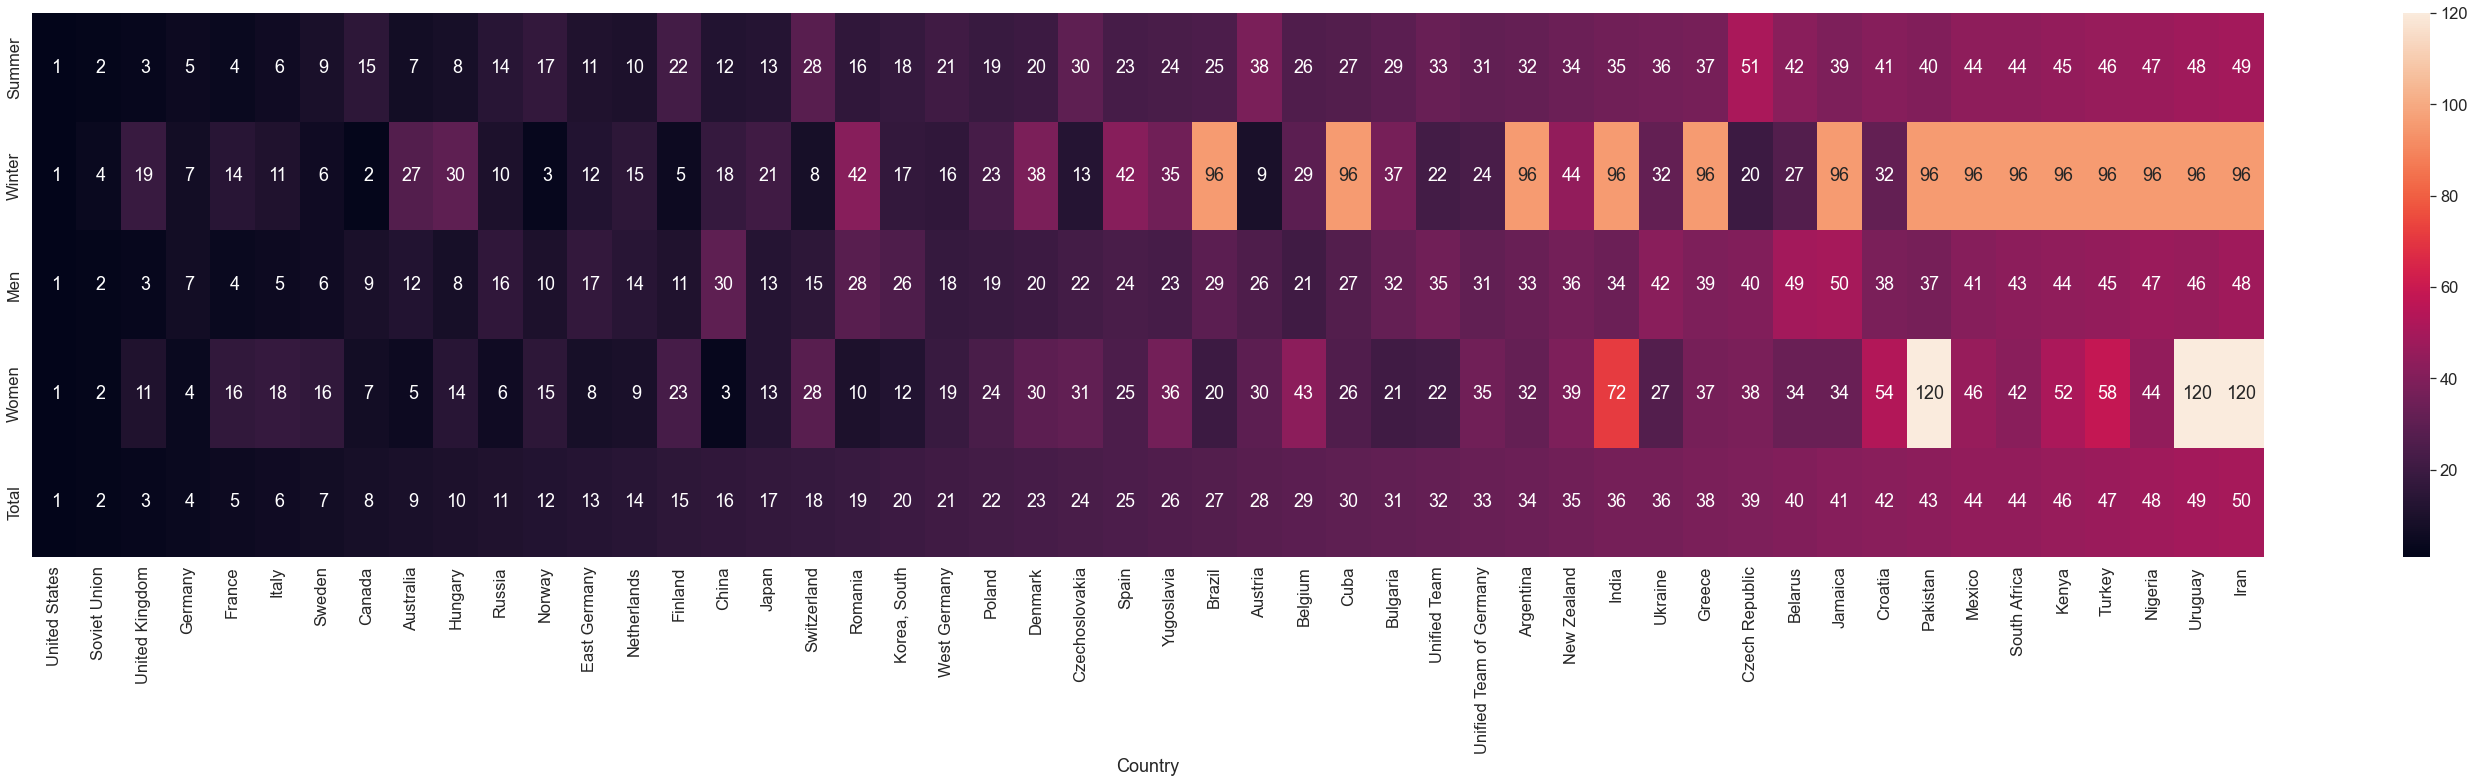

In [363]:
plt.figure(figsize=(50, 10))
sns.heatmap(top_50.T, annot=True, fmt='2.0f')
plt.show()

### Summer Games vs Winter Games - does Geographical Location Matter?

In [365]:
olympics.head(2)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens


In [377]:
top_50.sort_values('Summer').head(2)

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0


In [378]:
top_50.sort_values('Summer').T.head(5)

Country,United States,Soviet Union,United Kingdom,France,Germany,Italy,Australia,Hungary,Sweden,Netherlands,...,Croatia,Belarus,Mexico,South Africa,Kenya,Turkey,Nigeria,Uruguay,Iran,Czech Republic
Summer,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,41.0,42.0,43.5,43.5,45.0,46.0,47.0,48.0,49.0,51.0
Winter,1.0,4.0,19.0,14.0,7.0,11.0,27.0,30.0,6.0,15.0,...,31.5,27.0,95.5,95.5,95.5,95.5,95.5,95.5,95.5,20.0
Men,1.0,2.0,3.0,4.0,7.0,5.0,12.0,8.0,6.0,14.0,...,38.0,49.0,41.0,43.0,44.0,45.0,47.0,46.0,48.0,40.0
Women,1.0,2.0,11.0,16.5,4.0,18.0,5.0,14.0,16.5,9.0,...,53.5,33.5,46.0,42.0,51.5,58.5,44.5,120.0,120.0,38.0
Total,1.0,2.0,3.0,5.0,4.0,6.0,9.0,10.0,7.0,14.0,...,42.0,40.0,44.5,44.5,46.0,47.0,48.0,49.0,50.0,39.0


In [368]:
top_50.sort_values('Winter')

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Canada,15.0,2.0,9.0,7.0,8.0
Norway,17.0,3.0,10.0,15.0,12.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
Finland,22.0,5.0,11.0,23.0,15.0
Sweden,9.0,6.0,6.0,16.5,7.0
Germany,5.0,7.0,7.0,4.0,4.0
Switzerland,28.0,8.0,15.0,28.0,18.0
Austria,38.0,9.0,25.5,29.5,28.0


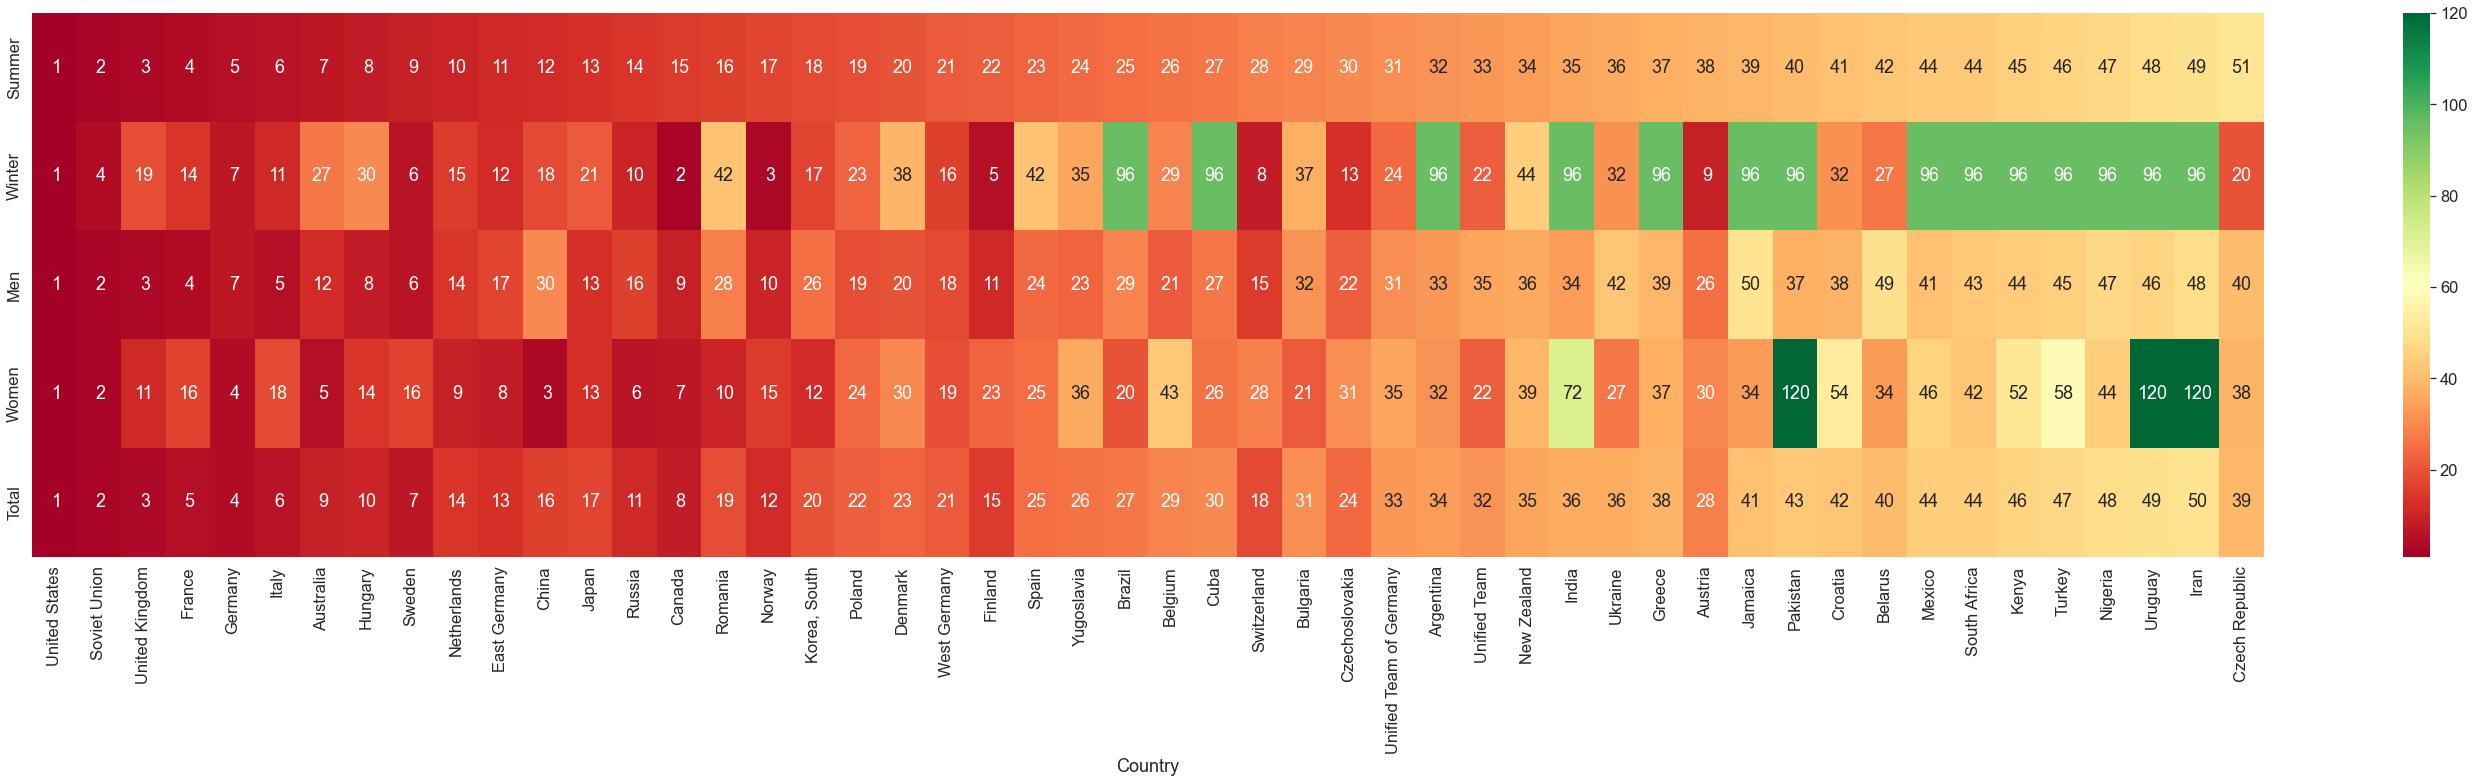

In [380]:
plt.figure(figsize=(50, 10))
sns.heatmap(top_50.sort_values('Summer').T, cmap='RdYlGn', annot=True, fmt='2.0f') 
plt.show()

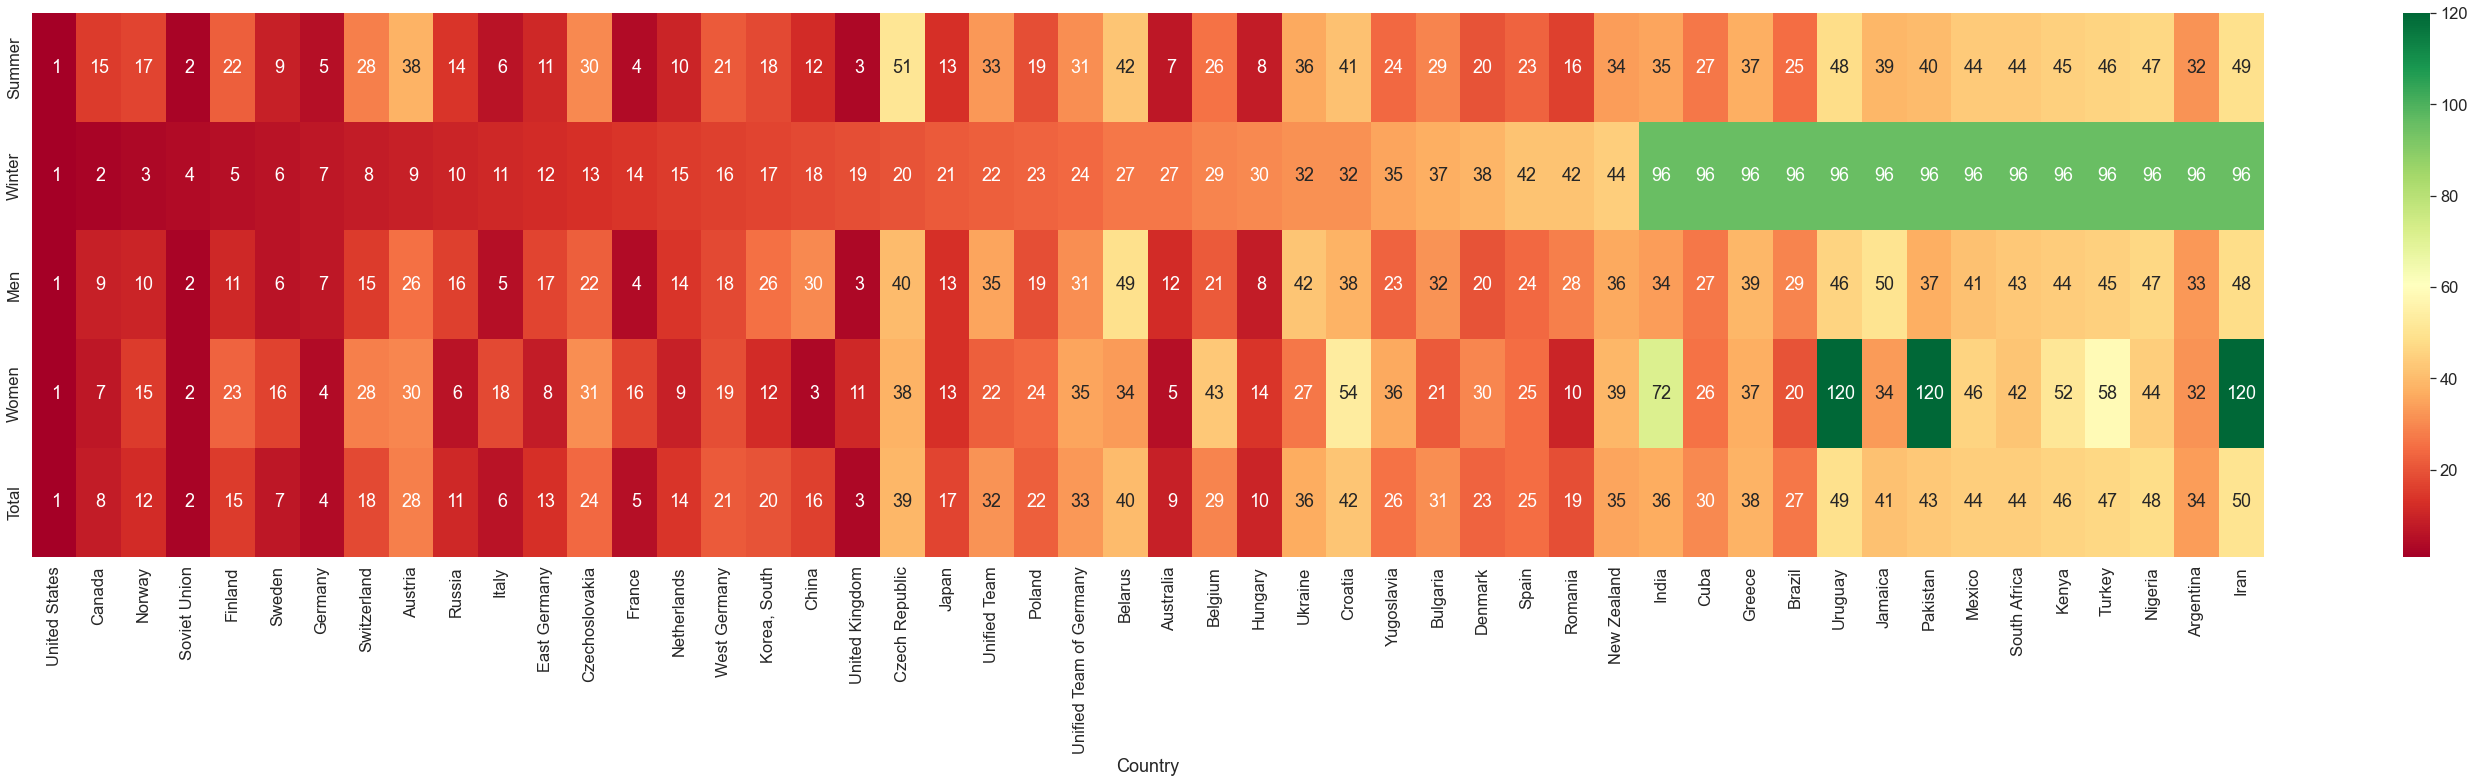

In [381]:
plt.figure(figsize=(50, 10))
sns.heatmap(top_50.sort_values('Winter').T, cmap='RdYlGn', annot=True, fmt='2.0f')
plt.show()

### Do Traditions matter?

In [382]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [386]:
olympics['Sport'].value_counts()

Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Luge                  180
Modern Pentathlon     180
Curling               172
Badminton             144
Table Tennis          144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse    

In [387]:
sports = olympics['Sport'].value_counts().index

In [388]:
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [392]:
top_20 = olympics['Country'].value_counts().head(20).index
top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [395]:
by_sport = pd.crosstab(olympics['Country'], olympics['Sport'])
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [397]:
by_sport = by_sport.rank(ascending=False, method='average')
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,18.0,84.0,16.0,78.0,76.0,83.0,74.0,9.0,6.5,35.0,...,75.0,79.0,89.5,21.0,79.0,76.5,86.0,74.0,28.5,32.0
West Indies Federation,101.0,84.0,53.5,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Yugoslavia,16.0,84.0,70.0,78.0,76.0,3.0,74.0,84.5,80.5,25.5,...,75.0,5.5,89.5,90.5,79.0,76.5,12.0,74.0,103.5,20.0


In [398]:
by_sport = by_sport.loc[top_20, sports].copy()
by_sport

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0
Italy,12.0,14.0,8.0,8.5,9.0,1.0,79.5,7.5,83.0,11.5,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Sweden,15.0,9.0,30.0,5.0,4.0,12.0,3.0,13.5,83.0,15.0,...,74.5,74.5,9.5,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Canada,13.0,12.5,3.0,30.5,12.0,90.0,1.0,22.0,83.0,2.0,...,1.0,3.0,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Australia,2.0,12.5,9.0,37.0,21.5,90.0,79.5,90.5,2.0,24.0,...,74.5,74.5,1.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Hungary,3.0,18.5,32.0,7.0,91.5,3.0,79.5,4.0,83.0,20.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0


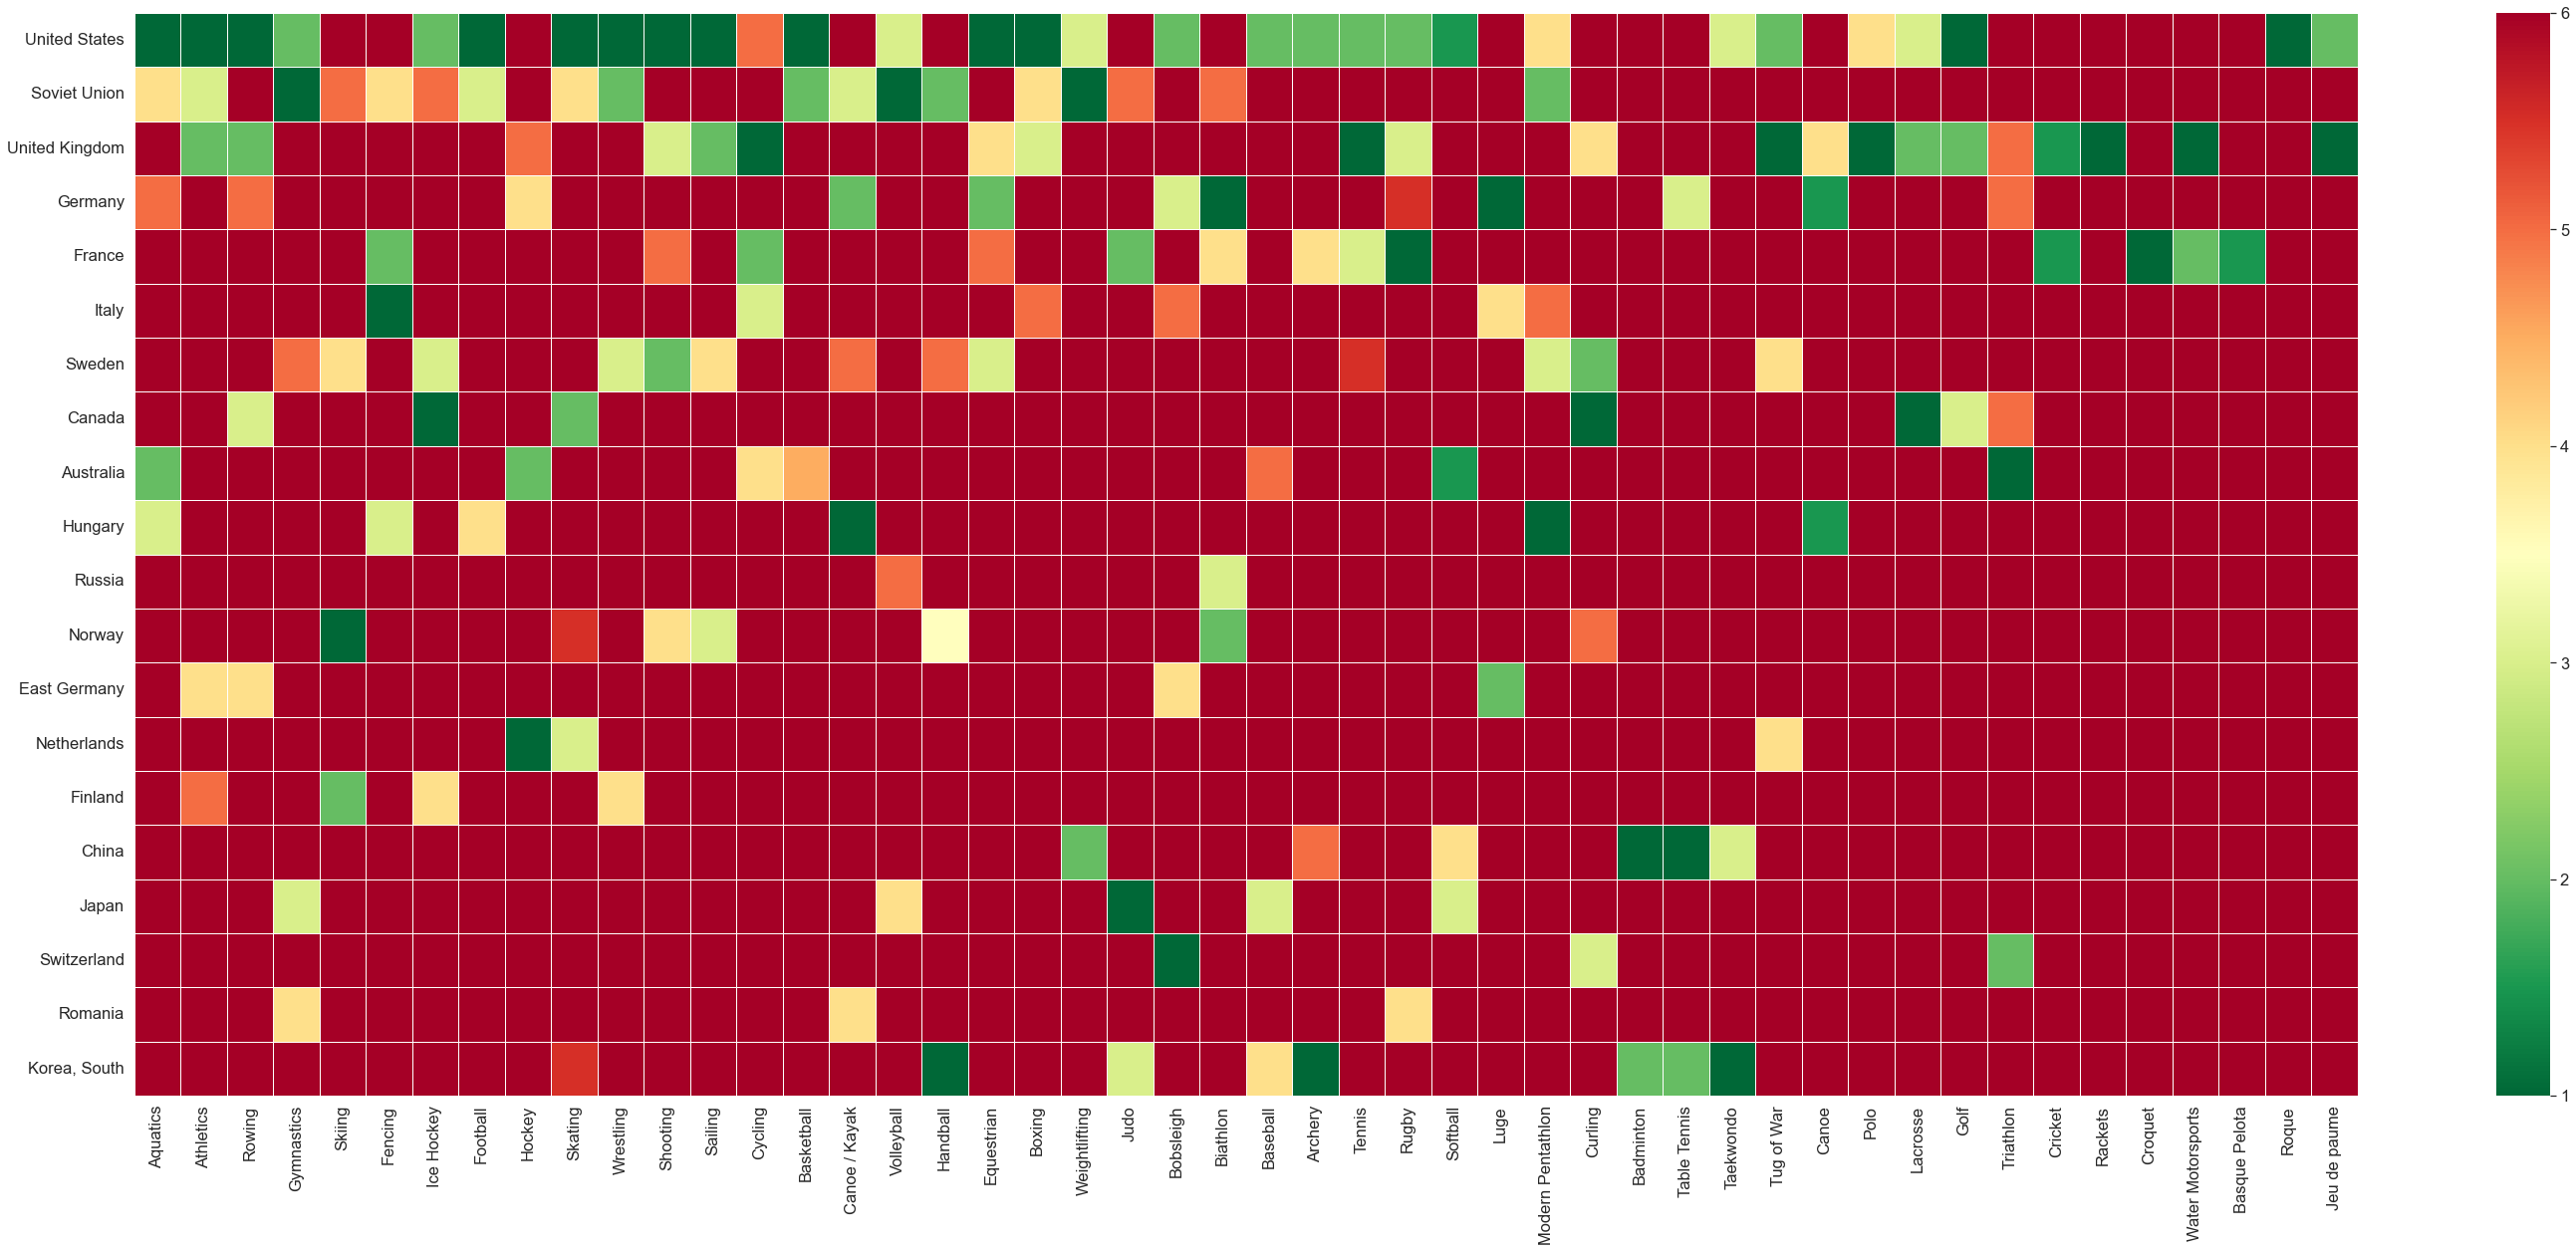

In [400]:
plt.figure(figsize=(50, 20))
sns.heatmap(by_sport, cmap= 'RdYlGn_r', vmin=1, vmax=6, linewidths=1)
plt.show()